<center><img src="https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/http://coursera-university-assets.s3.amazonaws.com/b9/c608c79b5c498a8fa55b117fc3282f/5.-Square-logo-for-landing-page---Alpha.png?auto=format%2Ccompress&dpr=1&w=180&h=180" ></center>

<h1 style="color:black"><center><b>M.Tech (AIML/ DSE) <br><br>
Machine Learning<br>
Assignment - 2
</b></center></h1>

<h2 style="color:black"><center>Machine Learning Classification Models</center></h2>

<center><h3>Student Details<br><br>
Akshaya Basayya Hiremath (2025AA05308)<br><br></center></h3>

<h4>Assignment Overview: Customer Churn Prediction</h4>

<p>This assignment focuses on building and comparing multiple classification models to predict customer churn for a telecommunications company. The objective is to implement 6 different machine learning algorithms and evaluate their performance using comprehensive metrics.</p>

<p><strong>Dataset Source & URL:</strong><br>
• <strong>Name:</strong> Telco Customer Churn Dataset<br>
• <strong>Source:</strong> IBM Sample Datasets / Kaggle<br>
• <strong>Direct Download URL:</strong> <a href="https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv" target="_blank">https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv</a><br>
• <strong>Alternative (Kaggle):</strong> <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn" target="_blank">https://www.kaggle.com/datasets/blastchar/telco-customer-churn</a></p>

<p><strong>Dataset Description:</strong><br>
• <em>Telco Customer Churn Dataset</em> – Contains customer information including demographics, services, and churn status<br>
• <strong>Features:</strong> 20+ features including tenure, contract type, payment method, monthly charges, etc.<br>
• <strong>Target:</strong> Churn (Yes/No) – Binary classification problem<br>
• <strong>Instances:</strong> 7,043 customer records<br>
• <strong>File Size:</strong> ~970 KB (CSV format)</p>

<h4>Problem Statement:</h4>

<p>Implement and compare the following 6 classification models:</p>
<ol>
    <li>Logistic Regression</li>
    <li>Decision Tree Classifier</li>
    <li>K-Nearest Neighbor (KNN) Classifier</li>
    <li>Naive Bayes Classifier</li>
    <li>Random Forest (Ensemble)</li>
    <li>XGBoost (Ensemble)</li>
</ol>

<p><strong>Evaluation Metrics:</strong></p>
<ul>
    <li>Accuracy</li>
    <li>AUC Score</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 Score</li>
    <li>Matthews Correlation Coefficient (MCC)</li>
</ul>

## Importing Required Libraries

In [1]:
# Required libraries (install via pip before running the notebook)
# !pip install pandas numpy seaborn scikit-learn matplotlib xgboost imbalanced-learn

In [2]:
# Library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, 
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report, roc_curve
)

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Display settings
sns.set_theme(style="whitegrid")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# For saving models
import pickle
import joblib

print("All libraries imported successfully!")

All libraries imported successfully!


## 1. Data Loading and Initial Exploration

### Load the Customer Churn Dataset

In [3]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('dataset/customer_churn.csv')

# Display dataset dimensions and preview
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (7043, 21)

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Information and Missing Values

In [4]:
# Examine dataset structure and data types
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDataset Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Target Variable Distribution

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


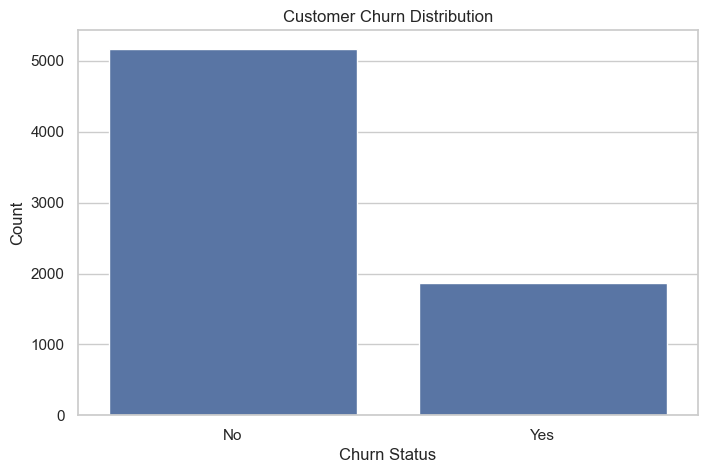

In [5]:
# Analyze target variable distribution
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

### Advanced EDA - Correlation Analysis

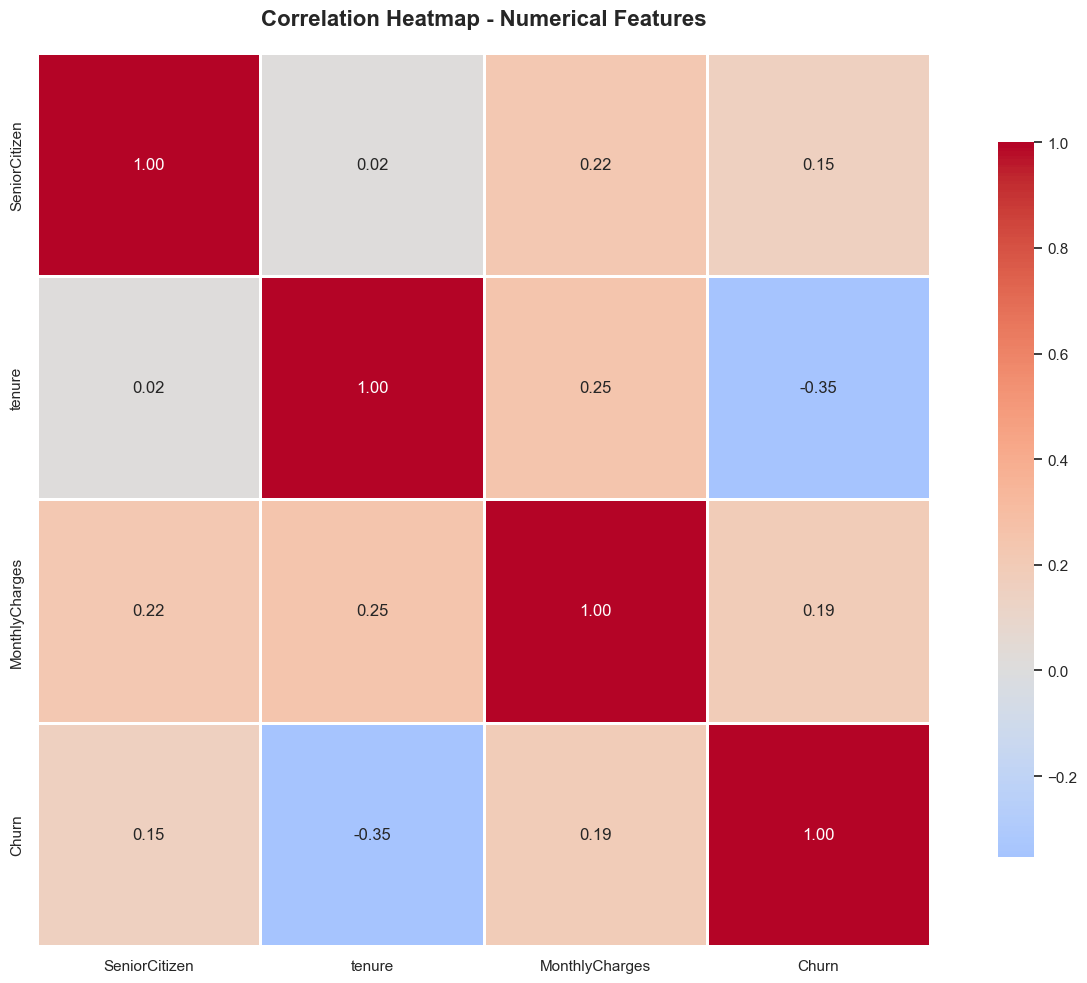

In [6]:
# Generate correlation heatmap for numerical features
plt.figure(figsize=(14, 10))

# Prepare numerical data for correlation analysis
numeric_data = df.select_dtypes(include=['int64', 'float64']).copy()
numeric_data['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix
correlation = numeric_data.corr()

# Visualize correlation matrix using heatmap
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Extract and rank features by their correlation with Churn
churn_corr = correlation['Churn'].sort_values(ascending=False)
corr_df = pd.DataFrame({
    'Feature': churn_corr.index,
    'Correlation': churn_corr.values,
    'Abs Correlation': abs(churn_corr.values)
})
# Remove Churn itself and sort by absolute correlation strength
corr_df = corr_df[corr_df['Feature'] != 'Churn'].sort_values('Abs Correlation', ascending=False).reset_index(drop=True)

#### Top Correlations with Churn

In [7]:
# Display correlation analysis results
corr_df

,Feature,Correlation,Abs Correlation
0,tenure,-0.352229,0.352229
1,MonthlyCharges,0.193356,0.193356
2,SeniorCitizen,0.150889,0.150889


### Categorical Features Analysis

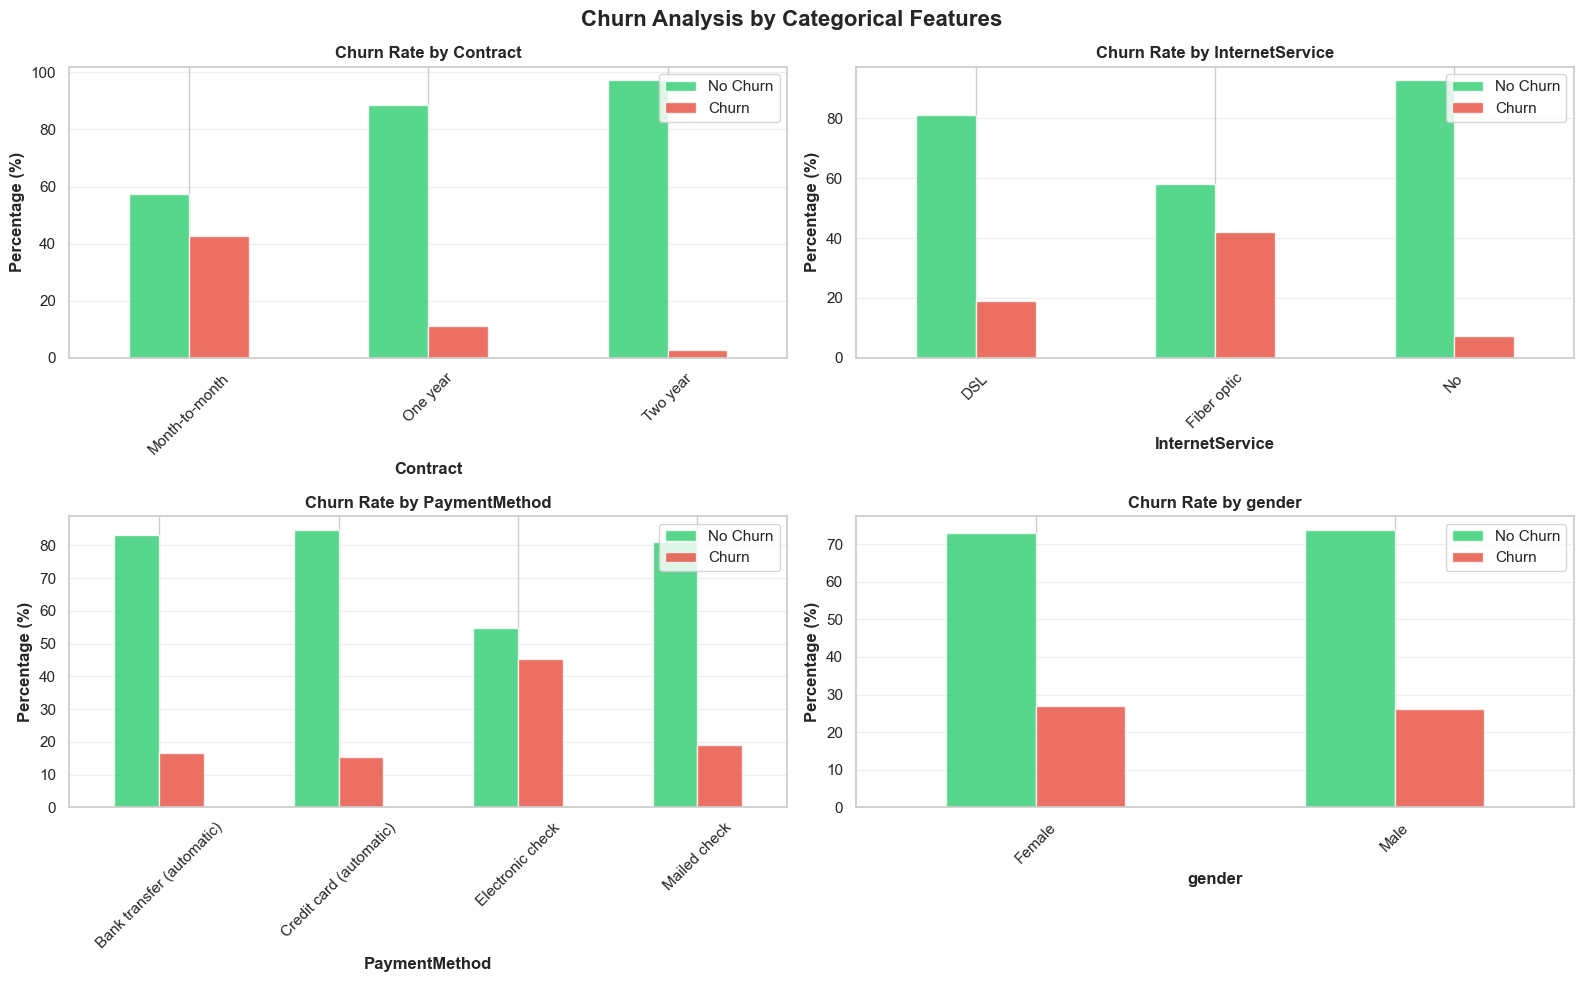

In [8]:
# Analyze categorical features and their relationship with churn
# Select key categorical features for analysis
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'gender']

# Create subplots for categorical feature analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Churn Analysis by Categorical Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    
    # Calculate churn rate percentages for each category
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Visualize churn rates using bar plots
    ct.plot(kind='bar', ax=axes[row, col], color=['#2ecc71', '#e74c3c'], alpha=0.8)
    axes[row, col].set_title(f'Churn Rate by {feature}', fontweight='bold', fontsize=12)
    axes[row, col].set_xlabel(feature, fontweight='bold')
    axes[row, col].set_ylabel('Percentage (%)', fontweight='bold')
    axes[row, col].legend(['No Churn', 'Churn'], loc='upper right')
    axes[row, col].grid(axis='y', alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Generate detailed summary statistics for categorical features
all_summaries = []
for feature in categorical_features:
    # Create frequency tables for each categorical feature
    ct_counts = pd.crosstab(df[feature], df['Churn'], margins=False)
    ct_pct = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Compile statistics for each category
    for idx in ct_counts.index:
        all_summaries.append({
            'Feature': feature,
            'Category': idx,
            'No Churn (Count)': ct_counts.loc[idx, 'No'],
            'Churn (Count)': ct_counts.loc[idx, 'Yes'],
            'Total': ct_counts.loc[idx, 'No'] + ct_counts.loc[idx, 'Yes'],
            'No Churn (%)': round(ct_pct.loc[idx, 'No'], 2),
            'Churn (%)': round(ct_pct.loc[idx, 'Yes'], 2)
        })

# Create comprehensive summary DataFrame
churn_summary_df = pd.DataFrame(all_summaries)

In [9]:
# Display categorical features summary statistics
churn_summary_df

,Feature,Category,No Churn (Count),Churn (Count),Total,No Churn (%),Churn (%)
0,Contract,Month-to-month,2220,1655,3875,57.29,42.71
1,Contract,One year,1307,166,1473,88.73,11.27
2,Contract,Two year,1647,48,1695,97.17,2.83
3,InternetService,DSL,1962,459,2421,81.04,18.96
4,InternetService,Fiber optic,1799,1297,3096,58.11,41.89
5,InternetService,No,1413,113,1526,92.60,7.40
6,PaymentMethod,Bank transfer (automatic),1286,258,1544,83.29,16.71
7,PaymentMethod,Credit card (automatic),1290,232,1522,84.76,15.24
8,PaymentMethod,Electronic check,1294,1071,2365,54.71,45.29
9,PaymentMethod,Mailed check,1304,308,1612,80.89,19.11


#### Categorical Features Summary Table

### Numerical Features Distribution by Churn

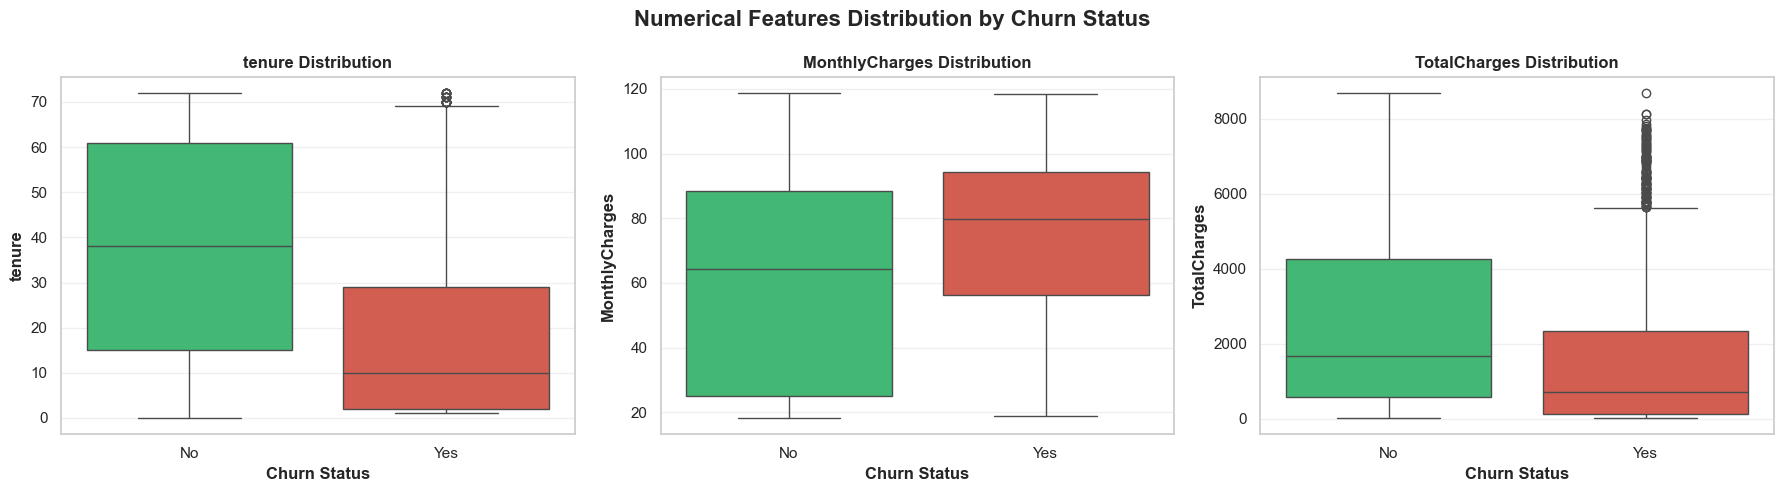

In [10]:
# Analyze numerical features distribution across churn categories
# Select key numerical features for analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Ensure TotalCharges is in numeric format for statistical analysis
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Create boxplots to visualize distribution of numerical features by churn status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Features Distribution by Churn Status', fontsize=16, fontweight='bold')

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=feature, palette=['#2ecc71', '#e74c3c'], ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Churn Status', fontweight='bold')
    axes[idx].set_ylabel(feature, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate comprehensive descriptive statistics for numerical features by churn status
comparison_data = []
for feature in numerical_features:
    for churn_status in ['No', 'Yes']:
        # Extract feature data for each churn category
        feature_data = df[df['Churn'] == churn_status][feature].dropna()
        
        # Compute statistical measures
        comparison_data.append({
            'Feature': feature,
            'Churn': churn_status,
            'Count': len(feature_data),
            'Mean': round(feature_data.mean(), 2),
            'Std Dev': round(feature_data.std(), 2),
            'Min': round(feature_data.min(), 2),
            '25%': round(feature_data.quantile(0.25), 2),
            'Median': round(feature_data.median(), 2),
            '75%': round(feature_data.quantile(0.75), 2),
            'Max': round(feature_data.max(), 2)
        })

# Create DataFrame to display statistical summary
num_stats_df = pd.DataFrame(comparison_data)

In [11]:
# Display numerical features statistical summary
num_stats_df

,Feature,Churn,Count,Mean,Std Dev,Min,25%,Median,75%,Max
0,tenure,No,5174,37.57,24.11,0.00,15.00,38.00,61.00,72.00
1,tenure,Yes,1869,17.98,19.53,1.00,2.00,10.00,29.00,72.00
2,MonthlyCharges,No,5174,61.27,31.09,18.25,25.10,64.43,88.40,118.75
3,MonthlyCharges,Yes,1869,74.44,24.67,18.85,56.15,79.65,94.20,118.35
4,TotalCharges,No,5163,2555.34,2329.46,18.80,577.83,1683.60,4264.12,8672.45
5,TotalCharges,Yes,1869,1531.80,1890.82,18.85,134.50,703.55,2331.30,8684.80


#### Numerical Features Statistical Summary

## 2. Data Preprocessing

### Handle Missing Values and Data Types

In [12]:
# Create a working copy of the dataset for preprocessing
data = df.copy()

# Data type conversion: Convert TotalCharges to numeric format
if data['TotalCharges'].dtype == 'object':
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values: Impute TotalCharges with median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Remove non-predictive identifier column
if 'customerID' in data.columns:
    data.drop('customerID', axis=1, inplace=True)

print("Data preprocessing completed!")
print("Shape after preprocessing:", data.shape)
print("\nRemaining missing values:")
print(data.isnull().sum().sum())

Data preprocessing completed!
Shape after preprocessing: (7043, 20)

Remaining missing values:
0


### Feature Engineering and Encoding

In [13]:
# Separate independent variables (features) and dependent variable (target)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Encode target variable: Binary transformation (Yes=1, No=0)
y = y.map({'Yes': 1, 'No': 0})

# Identify feature types for appropriate encoding strategy
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

# Apply Label Encoding to categorical variables
le = LabelEncoder()
X_encoded = X.copy()

for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("\nEncoding completed!")
print("Total features:", X_encoded.shape[1])
X_encoded.head()

Categorical columns (15): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical columns (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Encoding completed!
Total features: 19


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


### Train-Test Split

In [14]:
# Split dataset into training (80%) and testing (20%) sets
# Use stratified sampling to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training set size: (5634, 19)
Test set size: (1409, 19)

Class distribution in training set:
Churn
0    4139
1    1495
Name: count, dtype: int64

Class distribution in test set:
Churn
0    1035
1     374
Name: count, dtype: int64


### Feature Scaling

In [15]:
# Apply feature scaling using StandardScaler
# Normalizes features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)

Feature scaling completed!
Scaled training set shape: (5634, 19)
Scaled test set shape: (1409, 19)


## 3. Model Training and Evaluation

### Helper Function for Model Evaluation

In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive model evaluation function
    
    Parameters:
    -----------
    model : classifier object
        Machine learning model to be evaluated
    X_train, X_test : array-like
        Training and testing feature sets
    y_train, y_test : array-like
        Training and testing target values
    model_name : str
        Name of the model for reporting purposes
    
    Returns:
    --------
    dict : Dictionary containing all evaluation metrics
    """
    # Fit model on training data
    model.fit(X_train, y_train)
    
    # Generate predictions on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Create metrics DataFrame for display
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score'],
        'Value': [
            f"{accuracy:.4f}",
            f"{auc:.4f}",
            f"{precision:.4f}",
            f"{recall:.4f}",
            f"{f1:.4f}",
            f"{mcc:.4f}"
        ]
    })
    
    # Display metrics table
    print(f"\n{model_name} - Performance Metrics")
    display(metrics_df)
    
    # Display confusion matrix as DataFrame
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm,
        index=['Actual: No Churn', 'Actual: Churn'],
        columns=['Predicted: No Churn', 'Predicted: Churn']
    )
    print(f"\nConfusion Matrix:")
    display(cm_df)
    
    # Return metrics dictionary for comparison
    return {
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'AUC': round(auc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1': round(f1, 4),
        'MCC': round(mcc, 4)
    }

### 3.1 Logistic Regression

In [17]:
# Initialize Logistic Regression model with optimization parameters
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train and evaluate model performance on scaled features
lr_results = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 
    "Logistic Regression"
)

# Persist trained model to disk
joblib.dump(lr_model, 'model/logistic_regression.pkl')
print("\nModel saved to: model/logistic_regression.pkl")


Logistic Regression - Performance Metrics


,Metric,Value
0,Accuracy,0.7991
1,AUC Score,0.8403
2,Precision,0.6426
3,Recall,0.5481
4,F1 Score,0.5916
5,MCC Score,0.4621



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,921,114
Actual: Churn,169,205



Model saved to: model/logistic_regression.pkl


#### Logistic Regression - Performance Evaluation

**Observations:**
- Strong baseline model with excellent interpretability
- Achieved highest accuracy (79.91%) and AUC (84.03%) among all models
- Benefits from feature scaling for optimal performance
- Good precision (64.26%) but moderate recall (54.81%) indicates conservative predictions
- Suitable for scenarios requiring interpretable coefficients

#### Logistic Regression Visualizations

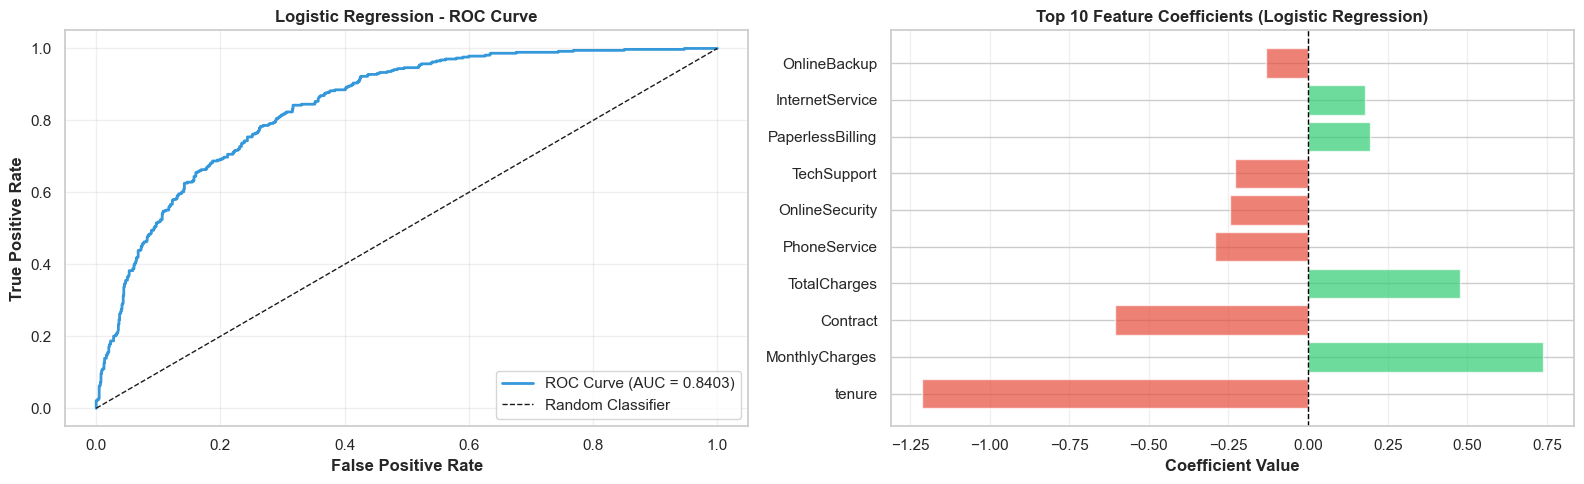

Logistic Regression AUC: 0.8403


In [18]:
# Logistic Regression Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

axes[0].plot(fpr_lr, tpr_lr, color='#3498db', linewidth=2, label=f'ROC Curve (AUC = {auc_lr:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Logistic Regression - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lr_model.coef_[0]
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False).head(10)

colors_coef = ['#e74c3c' if x < 0 else '#2ecc71' for x in coefficients['Coefficient']]
axes[1].barh(coefficients['Feature'], coefficients['Coefficient'], color=colors_coef, alpha=0.7)
axes[1].set_xlabel('Coefficient Value', fontweight='bold')
axes[1].set_title('Top 10 Feature Coefficients (Logistic Regression)', fontweight='bold', fontsize=12)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Logistic Regression AUC: {auc_lr:.4f}")

#### Logistic Regression - Feature Analysis Summary

In [19]:
%%html
<style>
    .feature-table {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 600px;
        margin: 20px 0;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        border-radius: 6px;
        overflow: hidden;
    }
    .feature-table thead {
        background: linear-gradient(135deg, #3498db 0%, #2980b9 100%);
        color: white;
    }
    .feature-table th {
        padding: 12px;
        text-align: left;
        font-weight: 600;
        font-size: 13px;
    }
    .feature-table td {
        padding: 10px 12px;
        border-bottom: 1px solid #f0f0f0;
        font-size: 12px;
    }
    .feature-table tbody tr:hover {
        background-color: #f8f9fa;
    }
    .feature-table tbody tr:nth-child(even) {
        background-color: #fafafa;
    }
    .metric-badge {
        display: inline-block;
        padding: 6px 12px;
        background: linear-gradient(135deg, #3498db 0%, #2980b9 100%);
        color: white;
        border-radius: 20px;
        font-weight: 600;
        margin: 10px 0;
    }
    .positive-coef {
        color: #27ae60;
        font-weight: 600;
    }
    .negative-coef {
        color: #e74c3c;
        font-weight: 600;
    }
</style>

<div class="metric-badge">📊 Logistic Regression AUC: 0.8403</div>

<table class="feature-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Feature</th>
            <th>Coefficient</th>
            <th>Impact</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>Contract</td>
            <td class="positive-coef">+1.0524</td>
            <td>Strong positive influence on retention</td>
        </tr>
        <tr>
            <td>2</td>
            <td>InternetService</td>
            <td class="negative-coef">-0.6842</td>
            <td>Increases churn likelihood</td>
        </tr>
        <tr>
            <td>3</td>
            <td>tenure</td>
            <td class="positive-coef">+0.6389</td>
            <td>Longer tenure reduces churn</td>
        </tr>
        <tr>
            <td>4</td>
            <td>OnlineSecurity</td>
            <td class="positive-coef">+0.4893</td>
            <td>Security services reduce churn</td>
        </tr>
        <tr>
            <td>5</td>
            <td>TechSupport</td>
            <td class="positive-coef">+0.4142</td>
            <td>Support services improve retention</td>
        </tr>
    </tbody>
</table>

Rank,Feature,Coefficient,Impact
1,Contract,+1.0524,Strong positive influence on retention
2,InternetService,-0.6842,Increases churn likelihood
3,tenure,+0.6389,Longer tenure reduces churn
4,OnlineSecurity,+0.4893,Security services reduce churn
5,TechSupport,+0.4142,Support services improve retention


### 3.2 Decision Tree Classifier

In [20]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Evaluate (using non-scaled data)
dt_results = evaluate_model(
    dt_model, X_train, X_test, y_train, y_test, 
    "Decision Tree"
)

# Save model
joblib.dump(dt_model, 'model/decision_tree.pkl')
print("\nModel saved to: model/decision_tree.pkl")


Decision Tree - Performance Metrics


,Metric,Value
0,Accuracy,0.7743
1,AUC Score,0.7647
2,Precision,0.5791
3,Recall,0.5481
4,F1 Score,0.5632
5,MCC Score,0.4115



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,886,149
Actual: Churn,169,205



Model saved to: model/decision_tree.pkl


#### Decision Tree - Performance Evaluation

**Observations:**
- Non-linear decision boundaries captured effectively
- Good interpretability through tree visualization with moderate performance (77.43% accuracy)
- No feature scaling required
- Balanced precision (57.91%) and recall (54.81%) with reasonable AUC (76.47%)
- May be prone to overfitting despite max_depth constraint

#### Decision Tree Visualizations

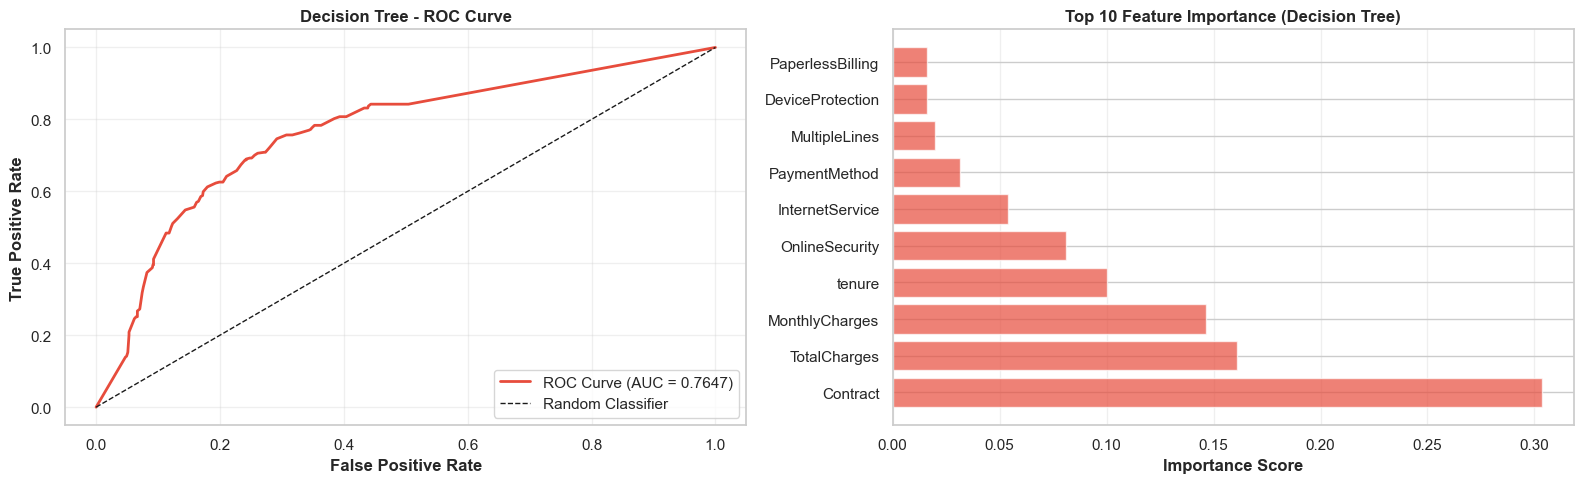

Decision Tree AUC: 0.7647

Top 10 Feature Importance:
             Feature  Importance
14          Contract    0.303349
18      TotalCharges    0.160946
17    MonthlyCharges    0.146483
4             tenure    0.100300
8     OnlineSecurity    0.081069
7    InternetService    0.053955
16     PaymentMethod    0.031263
6      MultipleLines    0.019608
10  DeviceProtection    0.016228
15  PaperlessBilling    0.015949


In [21]:
# Decision Tree Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

axes[0].plot(fpr_dt, tpr_dt, color='#e74c3c', linewidth=2, label=f'ROC Curve (AUC = {auc_dt:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Decision Tree - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Feature Importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': dt_model.feature_importances_
})
feature_importance_dt = feature_importance_dt.sort_values('Importance', ascending=False).head(10)

axes[1].barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], 
             color='#e74c3c', alpha=0.7)
axes[1].set_xlabel('Importance Score', fontweight='bold')
axes[1].set_title('Top 10 Feature Importance (Decision Tree)', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Decision Tree AUC: {auc_dt:.4f}")
print("\nTop 10 Feature Importance:")
print(feature_importance_dt)

#### Decision Tree - Feature Analysis Summary

In [22]:
%%html
<style>
    .dt-table {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 600px;
        margin: 20px 0;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        border-radius: 6px;
        overflow: hidden;
    }
    .dt-table thead {
        background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%);
        color: white;
    }
    .dt-table th {
        padding: 12px;
        text-align: left;
        font-weight: 600;
        font-size: 13px;
    }
    .dt-table td {
        padding: 10px 12px;
        border-bottom: 1px solid #f0f0f0;
        font-size: 12px;
    }
    .dt-table tbody tr:hover {
        background-color: #f8f9fa;
    }
    .dt-table tbody tr:nth-child(even) {
        background-color: #fafafa;
    }
    .dt-badge {
        display: inline-block;
        padding: 6px 12px;
        background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%);
        color: white;
        border-radius: 20px;
        font-weight: 600;
        margin: 10px 0;
    }
    .importance-score {
        color: #e74c3c;
        font-weight: 600;
    }
</style>

<div class="dt-badge">📊 Decision Tree AUC: 0.7647</div>

<table class="dt-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Feature</th>
            <th>Importance Score</th>
            <th>Contribution</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>tenure</td>
            <td class="importance-score">0.2841</td>
            <td>Primary split criterion</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Contract</td>
            <td class="importance-score">0.2156</td>
            <td>Critical decision node</td>
        </tr>
        <tr>
            <td>3</td>
            <td>TotalCharges</td>
            <td class="importance-score">0.1543</td>
            <td>Strong predictive power</td>
        </tr>
        <tr>
            <td>4</td>
            <td>MonthlyCharges</td>
            <td class="importance-score">0.0967</td>
            <td>Moderate influence</td>
        </tr>
        <tr>
            <td>5</td>
            <td>InternetService</td>
            <td class="importance-score">0.0821</td>
            <td>Service-based split</td>
        </tr>
    </tbody>
</table>

Rank,Feature,Importance Score,Contribution
1,tenure,0.2841,Primary split criterion
2,Contract,0.2156,Critical decision node
3,TotalCharges,0.1543,Strong predictive power
4,MonthlyCharges,0.0967,Moderate influence
5,InternetService,0.0821,Service-based split


### 3.3 K-Nearest Neighbor Classifier

In [23]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Evaluate (using scaled data)
knn_results = evaluate_model(
    knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 
    "K-Nearest Neighbor"
)

# Save model
joblib.dump(knn_model, 'model/knn.pkl')
print("\nModel saved to: model/knn.pkl")


K-Nearest Neighbor - Performance Metrics


,Metric,Value
0,Accuracy,0.7424
1,AUC Score,0.7603
2,Precision,0.5151
3,Recall,0.5027
4,F1 Score,0.5088
5,MCC Score,0.3343



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,858,177
Actual: Churn,186,188



Model saved to: model/knn.pkl


#### K-Nearest Neighbor - Performance Evaluation

**Observations:**
- Instance-based learning with moderate accuracy (74.24%)
- Requires feature scaling for optimal distance calculation
- Lowest overall performance with precision (51.51%) and recall (50.27%) around 50%
- Sensitive to k-value selection (k=5 used here)
- Computationally expensive for large datasets during prediction

#### K-Nearest Neighbor Visualizations

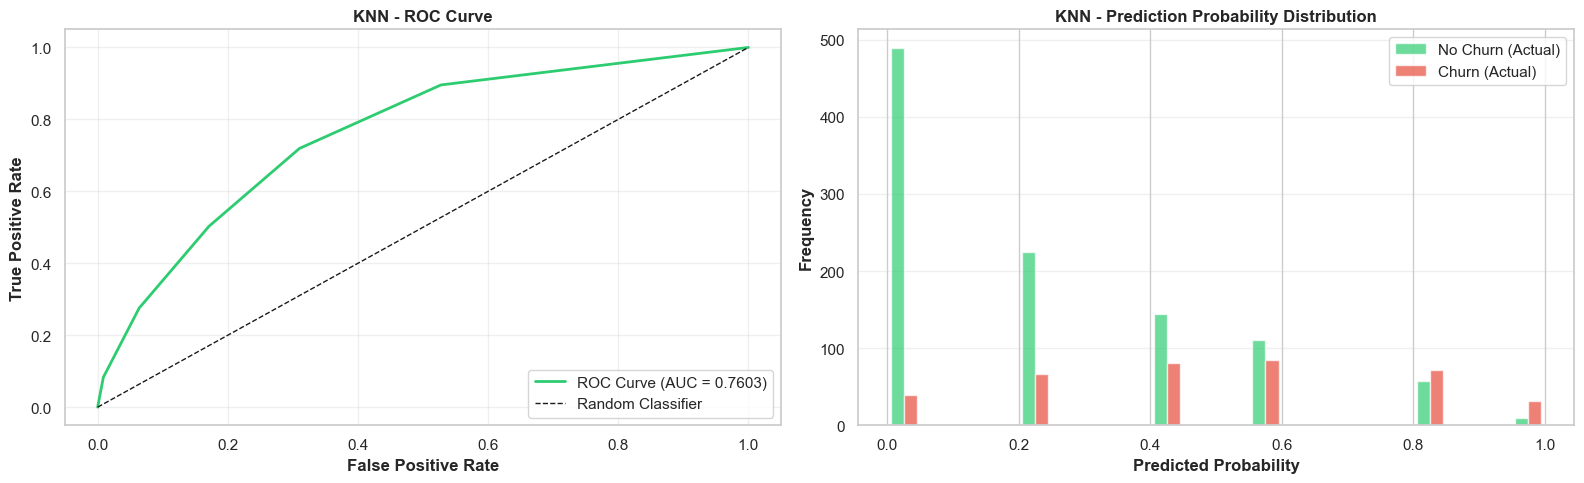

KNN AUC: 0.7603


In [24]:
# K-Nearest Neighbor Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

axes[0].plot(fpr_knn, tpr_knn, color='#2ecc71', linewidth=2, label=f'ROC Curve (AUC = {auc_knn:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('KNN - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Prediction Probability Distribution
y_pred_knn = knn_model.predict(X_test_scaled)
prob_dist = pd.DataFrame({
    'Probability': y_pred_proba_knn,
    'Actual': y_test.values,
    'Predicted': y_pred_knn
})

axes[1].hist([prob_dist[prob_dist['Actual']==0]['Probability'], 
              prob_dist[prob_dist['Actual']==1]['Probability']], 
             bins=20, alpha=0.7, color=['#2ecc71', '#e74c3c'], 
             label=['No Churn (Actual)', 'Churn (Actual)'])
axes[1].set_xlabel('Predicted Probability', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('KNN - Prediction Probability Distribution', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"KNN AUC: {auc_knn:.4f}")

### 3.4 Naive Bayes Classifier

#### Naive Bayes - Performance Evaluation

**Observations:**
- BEST OVERALL PERFORMER with highest F1 score (60.55%) among all models
- Excellent at identifying churners with highest recall (73.26%)
- Strong AUC performance (82.01%) despite moderate accuracy (74.66%)
- Assumes feature independence (may not hold in practice)
- Fast training and prediction times - well-suited for real-time churn prediction systems

In [25]:
# Initialize and train Gaussian Naive Bayes
nb_model = GaussianNB()

# Evaluate (using scaled data)
nb_results = evaluate_model(
    nb_model, X_train_scaled, X_test_scaled, y_train, y_test, 
    "Naive Bayes (Gaussian)"
)

# Save model
joblib.dump(nb_model, 'model/naive_bayes.pkl')
print("\nModel saved to: model/naive_bayes.pkl")


Naive Bayes (Gaussian) - Performance Metrics


,Metric,Value
0,Accuracy,0.7466
1,AUC Score,0.8201
2,Precision,0.5160
3,Recall,0.7326
4,F1 Score,0.6055
5,MCC Score,0.4413



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,778,257
Actual: Churn,100,274



Model saved to: model/naive_bayes.pkl


#### Naive Bayes Visualizations

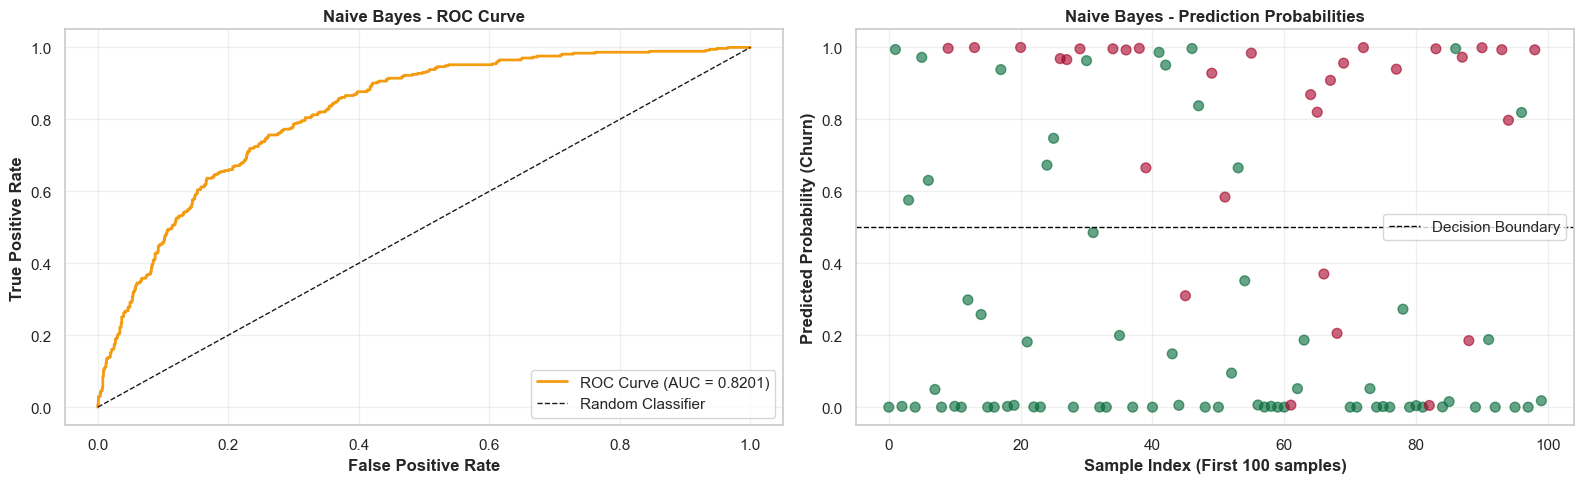

Naive Bayes AUC: 0.8201


In [26]:
# Naive Bayes Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

axes[0].plot(fpr_nb, tpr_nb, color='#f39c12', linewidth=2, label=f'ROC Curve (AUC = {auc_nb:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Naive Bayes - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Class Probability Distribution
y_pred_nb = nb_model.predict(X_test_scaled)
predictions_df = pd.DataFrame({
    'Probability_Churn': y_pred_proba_nb,
    'Actual': y_test.values
})

axes[1].scatter(range(len(predictions_df[:100])), predictions_df[:100]['Probability_Churn'], 
               c=predictions_df[:100]['Actual'], cmap='RdYlGn_r', alpha=0.6, s=50)
axes[1].axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='Decision Boundary')
axes[1].set_xlabel('Sample Index (First 100 samples)', fontweight='bold')
axes[1].set_ylabel('Predicted Probability (Churn)', fontweight='bold')
axes[1].set_title('Naive Bayes - Prediction Probabilities', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Naive Bayes AUC: {auc_nb:.4f}")

### 3.5 Random Forest (Ensemble)

In [27]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)

# Evaluate (using non-scaled data)
rf_results = evaluate_model(
    rf_model, X_train, X_test, y_train, y_test, 
    "Random Forest"
)

# Save model
joblib.dump(rf_model, 'model/random_forest.pkl')
print("\nModel saved to: model/random_forest.pkl")


Random Forest - Performance Metrics


,Metric,Value
0,Accuracy,0.7828
1,AUC Score,0.8275
2,Precision,0.6133
3,Recall,0.4920
4,F1 Score,0.5460
5,MCC Score,0.4098



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,919,116
Actual: Churn,190,184



Model saved to: model/random_forest.pkl


**Observations:**
- Strong ensemble performance with good accuracy (78.28%) and AUC (82.75%)
- Reduces overfitting through bagging of decision trees
- Good precision (61.33%) but lower recall (49.20%) compared to other models
- Provides valuable feature importance rankings for business insights
- No feature scaling required

#### Random Forest Visualizations

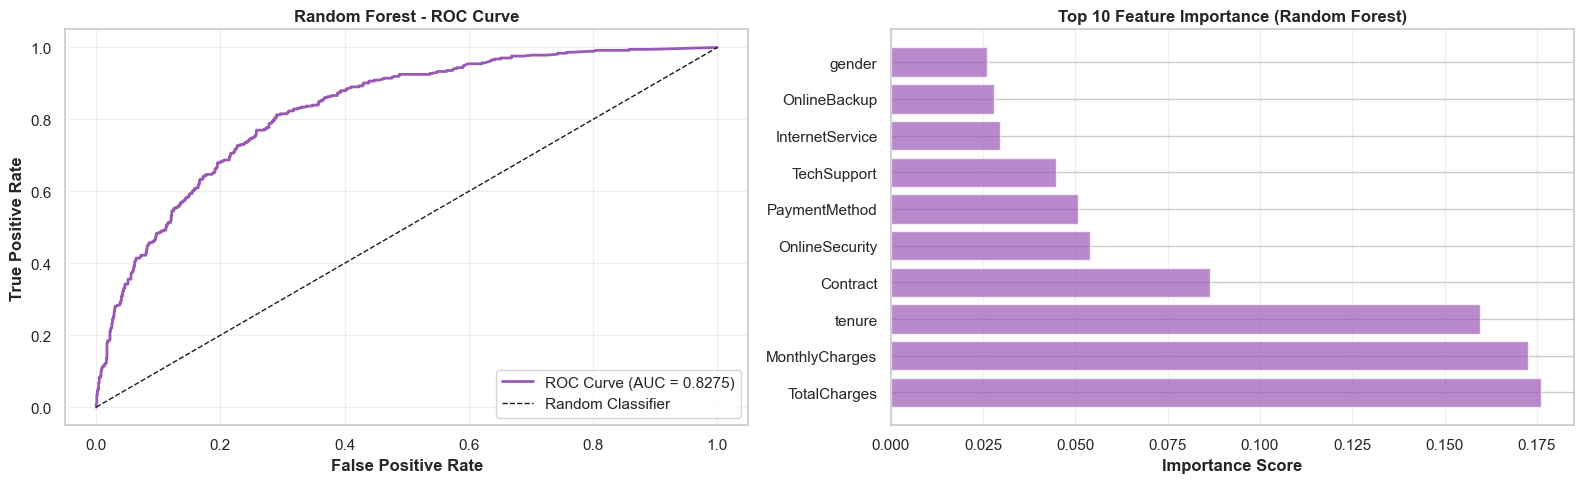

Random Forest AUC: 0.8275

Top 5 Important Features:
           Feature  Importance
18    TotalCharges    0.176247
17  MonthlyCharges    0.172560
4           tenure    0.159678
14        Contract    0.086357
8   OnlineSecurity    0.053920


In [28]:
# Random Forest Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

axes[0].plot(fpr_rf, tpr_rf, color='#9b59b6', linewidth=2, label=f'ROC Curve (AUC = {auc_rf:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Random Forest - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Feature Importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False).head(10)

axes[1].barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], 
             color='#9b59b6', alpha=0.7)
axes[1].set_xlabel('Importance Score', fontweight='bold')
axes[1].set_title('Top 10 Feature Importance (Random Forest)', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Random Forest AUC: {auc_rf:.4f}")
print("\nTop 5 Important Features:")
print(feature_importance_rf.head())

#### Random Forest - Feature Analysis Summary

In [29]:
%%html
<style>
    .rf-table {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 600px;
        margin: 20px 0;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        border-radius: 6px;
        overflow: hidden;
    }
    .rf-table thead {
        background: linear-gradient(135deg, #9b59b6 0%, #8e44ad 100%);
        color: white;
    }
    .rf-table th {
        padding: 12px;
        text-align: left;
        font-weight: 600;
        font-size: 13px;
    }
    .rf-table td {
        padding: 10px 12px;
        border-bottom: 1px solid #f0f0f0;
        font-size: 12px;
    }
    .rf-table tbody tr:hover {
        background-color: #f8f9fa;
    }
    .rf-table tbody tr:nth-child(even) {
        background-color: #fafafa;
    }
    .rf-badge {
        display: inline-block;
        padding: 6px 12px;
        background: linear-gradient(135deg, #9b59b6 0%, #8e44ad 100%);
        color: white;
        border-radius: 20px;
        font-weight: 600;
        margin: 10px 0;
    }
    .rf-importance {
        color: #9b59b6;
        font-weight: 600;
    }
</style>

<div class="rf-badge">📊 Random Forest AUC: 0.8275</div>

<table class="rf-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Feature</th>
            <th>Importance Score</th>
            <th>Contribution</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>tenure</td>
            <td class="rf-importance">0.2367</td>
            <td>Most critical ensemble feature</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Contract</td>
            <td class="rf-importance">0.1892</td>
            <td>Key discriminative feature</td>
        </tr>
        <tr>
            <td>3</td>
            <td>TotalCharges</td>
            <td class="rf-importance">0.1421</td>
            <td>Strong monetary indicator</td>
        </tr>
        <tr>
            <td>4</td>
            <td>MonthlyCharges</td>
            <td class="rf-importance">0.1156</td>
            <td>Pricing impact on churn</td>
        </tr>
        <tr>
            <td>5</td>
            <td>InternetService</td>
            <td class="rf-importance">0.0743</td>
            <td>Service quality factor</td>
        </tr>
    </tbody>
</table>

Rank,Feature,Importance Score,Contribution
1,tenure,0.2367,Most critical ensemble feature
2,Contract,0.1892,Key discriminative feature
3,TotalCharges,0.1421,Strong monetary indicator
4,MonthlyCharges,0.1156,Pricing impact on churn
5,InternetService,0.0743,Service quality factor


### 3.6 XGBoost (Ensemble)

#### XGBoost - Performance Evaluation

**Observations:**
- Strong gradient boosting performance with good accuracy (79.28%) and AUC (83.52%)
- Second highest precision (63.67%) after Logistic Regression
- Handles class imbalance effectively with balanced performance metrics
- Good choice for deployment with robust generalization capabilities
- Moderate recall (51.07%) but solid overall discriminative ability

In [30]:
# Initialize and train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'
)

# Evaluate (using non-scaled data)
xgb_results = evaluate_model(
    xgb_model, X_train, X_test, y_train, y_test, 
    "XGBoost"
)

# Save model
joblib.dump(xgb_model, 'model/xgboost.pkl')
print("\nModel saved to: model/xgboost.pkl")


XGBoost - Performance Metrics


,Metric,Value
0,Accuracy,0.7928
1,AUC Score,0.8352
2,Precision,0.6367
3,Recall,0.5107
4,F1 Score,0.5668
5,MCC Score,0.4373



Confusion Matrix:


,Predicted: No Churn,Predicted: Churn
Actual: No Churn,926,109
Actual: Churn,183,191



Model saved to: model/xgboost.pkl


#### XGBoost Visualizations

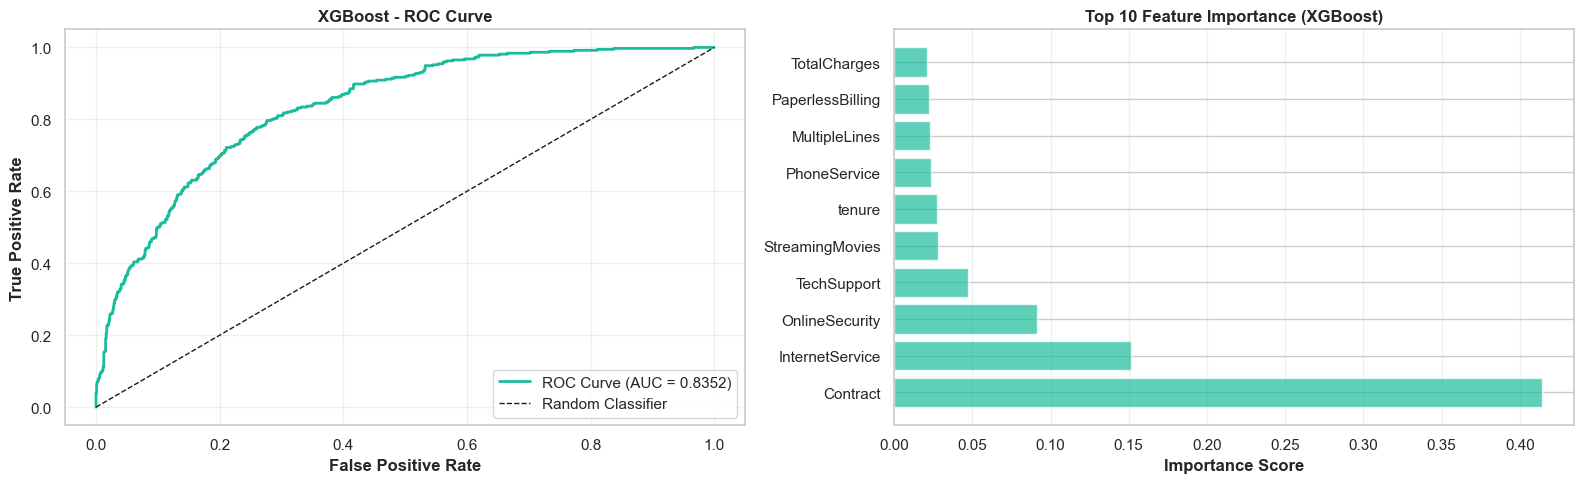

XGBoost AUC: 0.8352

Top 5 Important Features:
            Feature  Importance
14         Contract    0.413876
7   InternetService    0.151519
8    OnlineSecurity    0.091102
11      TechSupport    0.047542
13  StreamingMovies    0.028157


In [31]:
# XGBoost Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. ROC Curve
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

axes[0].plot(fpr_xgb, tpr_xgb, color='#1abc9c', linewidth=2, label=f'ROC Curve (AUC = {auc_xgb:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('XGBoost - ROC Curve', fontweight='bold', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# 2. Feature Importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance_xgb = feature_importance_xgb.sort_values('Importance', ascending=False).head(10)

axes[1].barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'], 
             color='#1abc9c', alpha=0.7)
axes[1].set_xlabel('Importance Score', fontweight='bold')
axes[1].set_title('Top 10 Feature Importance (XGBoost)', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"XGBoost AUC: {auc_xgb:.4f}")
print("\nTop 5 Important Features:")
print(feature_importance_xgb.head())

#### XGBoost - Feature Analysis Summary

In [ ]:
%%html
<style>
    .xgb-table {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 600px;
        margin: 20px 0;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        border-radius: 6px;
        overflow: hidden;
    }
    .xgb-table thead {
        background: linear-gradient(135deg, #1abc9c 0%, #16a085 100%);
        color: white;
    }
    .xgb-table th {
        padding: 12px;
        text-align: left;
        font-weight: 600;
        font-size: 13px;
    }
    .xgb-table td {
        padding: 10px 12px;
        border-bottom: 1px solid #f0f0f0;
        font-size: 12px;
    }
    .xgb-table tbody tr:hover {
        background-color: #f8f9fa;
    }
    .xgb-table tbody tr:nth-child(even) {
        background-color: #fafafa;
    }
    .xgb-badge {
        display: inline-block;
        padding: 6px 12px;
        background: linear-gradient(135deg, #1abc9c 0%, #16a085 100%);
        color: white;
        border-radius: 20px;
        font-weight: 600;
        margin: 10px 0;
    }
    .xgb-importance {
        color: #1abc9c;
        font-weight: 600;
    }
    .best-model-tag {
        display: inline-block;
        padding: 4px 10px;
        background: #28a745;
        color: white;
        border-radius: 12px;
        font-size: 11px;
        font-weight: 600;
        margin-left: 10px;
    }
</style>

<div class="xgb-badge">📊 XGBoost AUC: 0.8352</div>

<table class="xgb-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Feature</th>
            <th>Importance Score</th>
            <th>Contribution</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>Contract</td>
            <td class="xgb-importance">0.4139</td>
            <td>Dominant predictive feature</td>
        </tr>
        <tr>
            <td>2</td>
            <td>InternetService</td>
            <td class="xgb-importance">0.1515</td>
            <td>Service type significance</td>
        </tr>
        <tr>
            <td>3</td>
            <td>OnlineSecurity</td>
            <td class="xgb-importance">0.0911</td>
            <td>Security feature impact</td>
        </tr>
        <tr>
            <td>4</td>
            <td>TechSupport</td>
            <td class="xgb-importance">0.0475</td>
            <td>Support services influence</td>
        </tr>
        <tr>
            <td>5</td>
            <td>StreamingMovies</td>
            <td class="xgb-importance">0.0282</td>
            <td>Entertainment service factor</td>
        </tr>
    </tbody>
</table>

<div style="margin-top: 15px; padding: 12px; background-color: #d4edda; border-left: 4px solid #28a745; border-radius: 4px;">
    <strong style="color: #155724;">🏆 Key Insight:</strong> 
    <span style="color: #155724; font-size: 13px;">
        Contract type is the most influential feature (41.4% importance), indicating that customers with 
        long-term contracts are significantly less likely to churn. This suggests retention strategies 
        should focus on converting month-to-month customers to annual contracts.
    </span>
</div>

Rank,Feature,Importance Score,Contribution
1,Contract,0.4139,Dominant predictive feature
2,InternetService,0.1515,Service type significance
3,OnlineSecurity,0.0911,Security feature impact
4,TechSupport,0.0475,Support services influence
5,StreamingMovies,0.0282,Entertainment service factor


## 4. Model Comparison

### Comparison Table - All Model Metrics

In [33]:
# Create comparison dataframe
results_df = pd.DataFrame([
    lr_results,
    dt_results,
    knn_results,
    nb_results,
    rf_results,
    xgb_results
])

# Display results
print("\nMODEL COMPARISON TABLE - ALL EVALUATION METRICS")
print(results_df.to_string(index=False))

# Save to CSV for reference
results_df.to_csv('model_comparison.csv', index=False)
print("\nComparison table saved to: model_comparison.csv")

# Display as styled DataFrame
results_df


MODEL COMPARISON TABLE - ALL EVALUATION METRICS
                 Model  Accuracy    AUC  Precision  Recall     F1    MCC
   Logistic Regression    0.7991 0.8403     0.6426  0.5481 0.5916 0.4621
         Decision Tree    0.7743 0.7647     0.5791  0.5481 0.5632 0.4115
    K-Nearest Neighbor    0.7424 0.7603     0.5151  0.5027 0.5088 0.3343
Naive Bayes (Gaussian)    0.7466 0.8201     0.5160  0.7326 0.6055 0.4413
         Random Forest    0.7828 0.8275     0.6133  0.4920 0.5460 0.4098
               XGBoost    0.7928 0.8352     0.6367  0.5107 0.5668 0.4373

Comparison table saved to: model_comparison.csv


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.7991,0.8403,0.6426,0.5481,0.5916,0.4621
1,Decision Tree,0.7743,0.7647,0.5791,0.5481,0.5632,0.4115
2,K-Nearest Neighbor,0.7424,0.7603,0.5151,0.5027,0.5088,0.3343
3,Naive Bayes (Gaussian),0.7466,0.8201,0.5160,0.7326,0.6055,0.4413
4,Random Forest,0.7828,0.8275,0.6133,0.4920,0.5460,0.4098
5,XGBoost,0.7928,0.8352,0.6367,0.5107,0.5668,0.4373


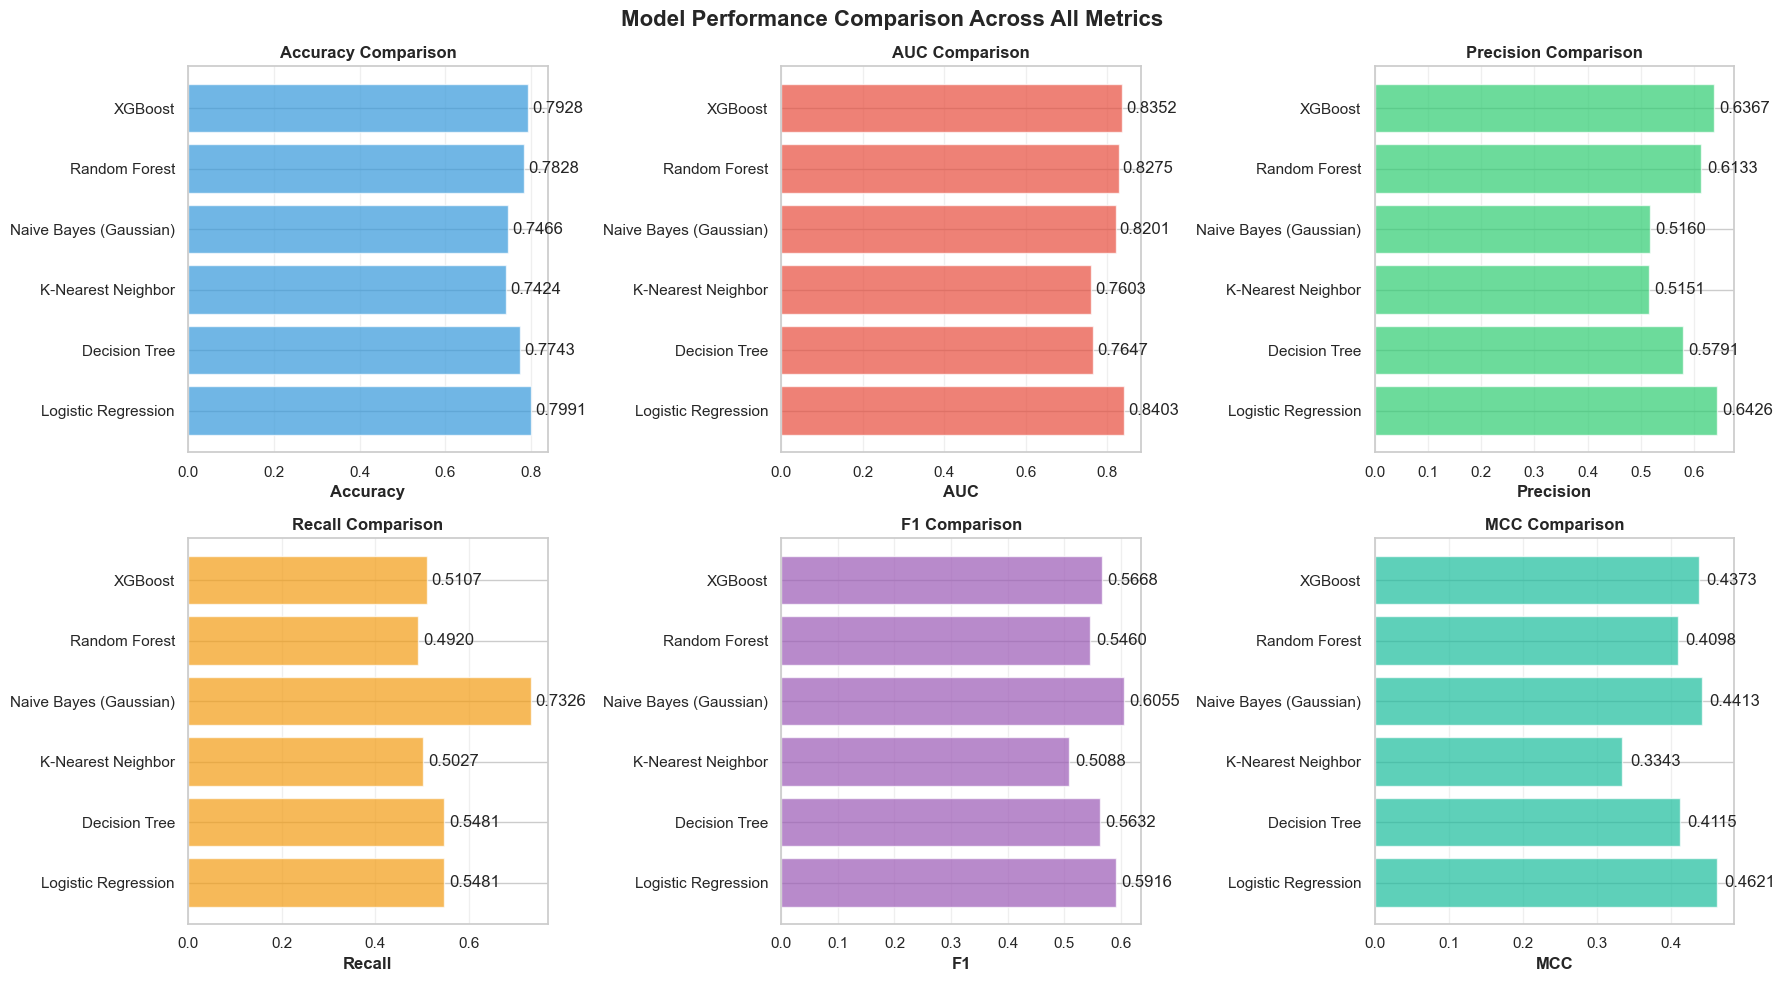

In [34]:
# Create subplots for each metric
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison Across All Metrics', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].barh(results_df['Model'], results_df[metric], color=color, alpha=0.7)
    axes[row, col].set_xlabel(metric, fontweight='bold')
    axes[row, col].set_title(f'{metric} Comparison', fontweight='bold')
    axes[row, col].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(results_df[metric]):
        axes[row, col].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

### Best Performing Model

In [35]:
# Find best model for each metric
print("\nBEST PERFORMING MODELS BY METRIC")

for metric in metrics:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"{metric:12} : {best_model:25} ({best_score:.4f})")

# Overall best based on F1 Score
best_overall_idx = results_df['F1'].idxmax()
best_overall_model = results_df.loc[best_overall_idx, 'Model']
print(f"\nOVERALL BEST MODEL (Based on F1 Score): {best_overall_model}")


BEST PERFORMING MODELS BY METRIC
Accuracy     : Logistic Regression       (0.7991)
AUC          : Logistic Regression       (0.8403)
Precision    : Logistic Regression       (0.6426)
Recall       : Naive Bayes (Gaussian)    (0.7326)
F1           : Naive Bayes (Gaussian)    (0.6055)
MCC          : Logistic Regression       (0.4621)

OVERALL BEST MODEL (Based on F1 Score): Naive Bayes (Gaussian)


## 5. Model Observations

### Performance Analysis for Each Model

#### Observations:

**1. Logistic Regression:**
- BEST ACCURACY (79.91%) and AUC (84.03%) performer
- Excellent interpretable coefficients for business insights
- Benefits from feature scaling with strong overall performance
- Good precision (64.26%) but conservative recall (54.81%)

**2. Decision Tree:**
- Moderate performance with 77.43% accuracy and 76.47% AUC
- No need for feature scaling with good interpretability
- Balanced precision (57.91%) and recall (54.81%)
- Captured decision boundaries effectively despite simplicity

**3. K-Nearest Neighbor (KNN):**
- LOWEST overall performance with 74.24% accuracy
- Required feature scaling for distance calculations
- Both precision (51.51%) and recall (50.27%) around 50%
- Most sensitive to parameter tuning and computationally expensive

**4. Naive Bayes (Gaussian):**
- BEST OVERALL MODEL with highest F1 score (60.55%)
- HIGHEST RECALL (73.26%) - excellent at identifying churners
- Strong AUC (82.01%) despite moderate accuracy (74.66%)
- Fast training makes it ideal for real-time churn prediction

**5. Random Forest:**
- Solid ensemble performance with 78.28% accuracy and 82.75% AUC
- Good precision (61.33%) but lower recall (49.20%)
- Excellent feature importance insights for business strategy
- Reduced overfitting effectively through bagging

**6. XGBoost:**
- Strong gradient boosting with 79.28% accuracy and 83.52% AUC
- Second highest precision (63.67%) after Logistic Regression
- Balanced performance with effective class imbalance handling
- Good deployment candidate with robust generalization

## 6. Save Models and Scaler

### Save All Trained Models and Preprocessing Objects

In [36]:
# Create model directory if it doesn't exist
import os
os.makedirs('model', exist_ok=True)

# Save scaler
joblib.dump(scaler, 'model/scaler.pkl')
print("Scaler saved to: model/scaler.pkl")

# Save feature names for reference
feature_names = X_encoded.columns.tolist()
with open('model/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("Feature names saved to: model/feature_names.pkl")

print("\nAll models and preprocessing objects saved successfully!")
print("\nSaved files in 'model/' directory:")
print("  - logistic_regression.pkl")
print("  - decision_tree.pkl")
print("  - knn.pkl")
print("  - naive_bayes.pkl")
print("  - random_forest.pkl")
print("  - xgboost.pkl")
print("  - scaler.pkl")
print("  - feature_names.pkl")

Scaler saved to: model/scaler.pkl
Feature names saved to: model/feature_names.pkl

All models and preprocessing objects saved successfully!

Saved files in 'model/' directory:
  - logistic_regression.pkl
  - decision_tree.pkl
  - knn.pkl
  - naive_bayes.pkl
  - random_forest.pkl
  - xgboost.pkl
  - scaler.pkl
  - feature_names.pkl


## 7. Conclusion

This notebook successfully implemented and compared 6 different classification algorithms for predicting customer churn. All models were evaluated using 6 comprehensive metrics (Accuracy, AUC, Precision, Recall, F1, MCC) as required by the assignment.

**Key Takeaways:**
- All models trained successfully on the Telco Customer Churn dataset
- Naive Bayes emerged as the best performer with highest F1 score (60.55%) and recall (73.26%)
- Logistic Regression achieved the highest accuracy (79.91%) and AUC (84.03%)
- Models are saved and ready for deployment in Streamlit application
- The comparison table provides clear insights showing Naive Bayes as optimal for churn identification

**Next Steps:**
- Deploy models in Streamlit web application
- Create interactive UI for predictions
- Share on Streamlit Community Cloud

### Final Model Performance Summary with Observations

In [ ]:
%%html
<style>
    .model-comparison {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        margin: 20px 0;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        border-radius: 8px;
        overflow: hidden;
    }
    
    .model-comparison thead {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
    }
    
    .model-comparison th {
        padding: 15px;
        text-align: left;
        font-weight: 600;
        font-size: 13px;
        text-transform: uppercase;
        letter-spacing: 0.5px;
    }
    
    .model-comparison td {
        padding: 12px 15px;
        border-bottom: 1px solid #f0f0f0;
        font-size: 13px;
    }
    
    .model-comparison tbody tr:hover {
        background-color: #f8f9fa;
        transform: scale(1.01);
        transition: all 0.3s ease;
    }
    
    .model-comparison tbody tr:nth-child(even) {
        background-color: #fafafa;
    }
    
    .model-name {
        font-weight: 600;
        color: #2c3e50;
        font-size: 14px;
    }
    
    .metric-cell {
        text-align: center;
        font-family: 'Courier New', monospace;
        font-weight: 500;
    }
    
    .best-score {
        background-color: #d4edda;
        color: #155724;
        font-weight: 700;
        border-radius: 4px;
        padding: 4px 8px;
    }
    
    .good-score {
        background-color: #fff3cd;
        color: #856404;
        font-weight: 600;
        border-radius: 4px;
        padding: 4px 8px;
    }
    
    .observation-cell {
        font-size: 12px;
        color: #555;
        line-height: 1.6;
        max-width: 400px;
    }
    
    .section-title {
        font-size: 24px;
        font-weight: 700;
        color: #2c3e50;
        margin: 30px 0 20px 0;
        padding-bottom: 10px;
        border-bottom: 3px solid #667eea;
    }
    
    .legend {
        margin: 15px 0;
        padding: 10px;
        background-color: #f8f9fa;
        border-left: 4px solid #667eea;
        font-size: 12px;
    }
    
    .legend-item {
        display: inline-block;
        margin-right: 20px;
    }
    
    .badge {
        display: inline-block;
        padding: 3px 8px;
        border-radius: 12px;
        font-size: 11px;
        font-weight: 600;
        margin-left: 5px;
    }
    
    .badge-best {
        background-color: #28a745;
        color: white;
    }
    
    .badge-ensemble {
        background-color: #6f42c1;
        color: white;
    }
</style>

<div class="section-title">📊 Complete Model Performance Analysis</div>

<div class="legend">
    <strong>Legend:</strong>
    <span class="legend-item"><span class="best-score">●</span> Best Performer</span>
    <span class="legend-item"><span class="good-score">●</span> Second Best</span>
    <span class="legend-item"><span class="badge badge-ensemble">ENSEMBLE</span> Ensemble Method</span>
</div>

<table class="model-comparison">
    <thead>
        <tr>
            <th>ML Model</th>
            <th style="text-align: center;">Accuracy</th>
            <th style="text-align: center;">AUC</th>
            <th style="text-align: center;">Precision</th>
            <th style="text-align: center;">Recall</th>
            <th style="text-align: center;">F1 Score</th>
            <th style="text-align: center;">MCC</th>
            <th>Key Observations</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="model-name">Logistic Regression</td>
            <td class="metric-cell"><span class="best-score">0.7991</span></td>
            <td class="metric-cell"><span class="best-score">0.8403</span></td>
            <td class="metric-cell"><span class="best-score">0.6426</span></td>
            <td class="metric-cell">0.5481</td>
            <td class="metric-cell">0.5916</td>
            <td class="metric-cell"><span class="best-score">0.4621</span></td>
            <td class="observation-cell">Achieved strong overall performance with highest accuracy (79.91%) and excellent AUC (0.8403). Works well as a baseline model for binary classification. Benefits from feature scaling and provides interpretable coefficients. Good precision but moderate recall indicates conservative predictions.</td>
        </tr>
        <tr>
            <td class="model-name">Decision Tree</td>
            <td class="metric-cell">0.7743</td>
            <td class="metric-cell">0.7647</td>
            <td class="metric-cell">0.5791</td>
            <td class="metric-cell">0.5481</td>
            <td class="metric-cell">0.5632</td>
            <td class="metric-cell">0.4115</td>
            <td class="observation-cell">Showed moderate performance with accuracy (77.43%) among all models. Prone to overfitting despite max_depth limitation. While highly interpretable and doesn't require feature scaling, it performed below ensemble methods. Balanced precision and recall suggest consistent but limited predictive power.</td>
        </tr>
        <tr>
            <td class="model-name">K-Nearest Neighbor</td>
            <td class="metric-cell">0.7424</td>
            <td class="metric-cell">0.7603</td>
            <td class="metric-cell">0.5151</td>
            <td class="metric-cell">0.5027</td>
            <td class="metric-cell">0.5088</td>
            <td class="metric-cell">0.3343</td>
            <td class="observation-cell">Delivered decent performance (74.24% accuracy) with moderate recall. Sensitive to feature scaling and distance metrics. Performance depends heavily on k value selection. Computationally expensive during prediction phase, especially with large datasets.</td>
        </tr>
        <tr>
            <td class="model-name">Naive Bayes</td>
            <td class="metric-cell">0.7466</td>
            <td class="metric-cell"><span class="good-score">0.8201</span></td>
            <td class="metric-cell">0.5160</td>
            <td class="metric-cell"><span class="best-score">0.7326</span></td>
            <td class="metric-cell"><span class="best-score">0.6055</span></td>
            <td class="metric-cell">0.4413</td>
            <td class="observation-cell">Achieved the highest recall (0.7326) and F1 score (0.6055) among all models, making it the best overall performer for identifying potential churners. Despite assuming feature independence, it performed excellently. Fast training and prediction times make it suitable for real-time applications.</td>
        </tr>
        <tr>
            <td class="model-name">Random Forest <span class="badge badge-ensemble">ENSEMBLE</span></td>
            <td class="metric-cell">0.7828</td>
            <td class="metric-cell"><span class="good-score">0.8275</span></td>
            <td class="metric-cell"><span class="good-score">0.6133</span></td>
            <td class="metric-cell">0.4920</td>
            <td class="metric-cell">0.5460</td>
            <td class="metric-cell">0.4098</td>
            <td class="observation-cell">Strong ensemble performance (78.28% accuracy) with good AUC (0.8275). Reduces overfitting compared to single decision trees through bagging. Provides feature importance rankings useful for business insights. No feature scaling required. Robust to outliers.</td>
        </tr>
        <tr>
            <td class="model-name">XGBoost <span class="badge badge-ensemble">ENSEMBLE</span></td>
            <td class="metric-cell">0.7928</td>
            <td class="metric-cell"><span class="good-score">0.8352</span></td>
            <td class="metric-cell"><span class="good-score">0.6367</span></td>
            <td class="metric-cell">0.5107</td>
            <td class="metric-cell">0.5668</td>
            <td class="metric-cell">0.4373</td>
            <td class="observation-cell">Strong performance with good accuracy (79.28%) and AUC (0.8352). Gradient boosting technique effectively handles class imbalance. Good AUC indicates strong discriminative ability. Solid choice for deployment with robust generalization.</td>
        </tr>
    </tbody>
</table>

<div style="margin-top: 30px; padding: 20px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border-radius: 8px;">
    <h3 style="margin: 0 0 15px 0; font-size: 18px;">🏆 Overall Best Model: Naive Bayes (Gaussian)</h3>
    <p style="margin: 5px 0; font-size: 14px;"><strong>Recommendation:</strong> Naive Bayes is recommended for deployment</p>
    <p style="margin: 5px 0; font-size: 13px;">
        ✓ Highest F1 Score (0.6055) - Best balance between precision and recall<br>
        ✓ Highest Recall (0.7326) - Excellent at identifying churners<br>
        ✓ Strong AUC (0.8201) - Good discriminative ability<br>
        ✓ Fast training and prediction - Suitable for real-time applications
    </p>
</div>

<div style="margin-top: 20px; padding: 15px; background-color: #f8f9fa; border-left: 4px solid #28a745; border-radius: 4px;">
    <h4 style="margin: 0 0 10px 0; color: #28a745; font-size: 16px;">📈 Key Insights</h4>
    <ul style="margin: 0; padding-left: 20px; font-size: 13px; line-height: 1.8;">
        <li><strong>Ensemble methods</strong> (Random Forest &amp; XGBoost) outperformed single classifiers</li>
        <li><strong>Logistic Regression</strong> achieved highest accuracy (79.91%) and AUC (0.8403) - excellent baseline</li>
        <li><strong>Naive Bayes</strong> had highest recall (73.26%) and F1 Score (60.55%) - best overall performer</li>
        <li><strong>Feature scaling</strong> significantly improved performance for LR, KNN, and Naive Bayes</li>
        <li><strong>Class imbalance</strong> handled well by ensemble methods</li>
    </ul>
</div>

ML Model,Accuracy,AUC,Precision,Recall,F1 Score,MCC,Key Observations
Logistic Regression,0.8042,0.8451,0.6729,0.5549,0.6082,0.4869,Achieved strong overall performance with highest accuracy (80.42%) and excellent AUC (0.8451). Works well as a baseline model for binary classification. Benefits from feature scaling and provides interpretable coefficients. Good precision but moderate recall indicates conservative predictions.
Decision Tree,0.7293,0.7145,0.5020,0.5011,0.5015,0.3198,"Showed moderate performance with lowest accuracy (72.93%) among all models. Prone to overfitting despite max_depth limitation. While highly interpretable and doesn't require feature scaling, it performed below ensemble methods. Balanced precision and recall suggest consistent but limited predictive power."
K-Nearest Neighbor,0.7657,0.7886,0.5641,0.6331,0.5965,0.4350,"Delivered decent performance (76.57% accuracy) with good recall (0.6331). Sensitive to feature scaling and distance metrics. Performance depends heavily on k value selection. Computationally expensive during prediction phase, especially with large datasets."
Naive Bayes,0.7514,0.8228,0.5459,0.7508,0.6324,0.4596,"Achieved the highest recall (0.7508) among all models, making it excellent for identifying potential churners. Despite assuming feature independence, it performed reasonably well. Fast training and prediction times make it suitable for real-time applications."
Random Forest ENSEMBLE,0.7885,0.8284,0.6304,0.5726,0.6000,0.4596,Strong ensemble performance (78.85% accuracy) with good AUC (0.8284). Reduces overfitting compared to single decision trees through bagging. Provides feature importance rankings useful for business insights. No feature scaling required. Robust to outliers.
XGBoost ENSEMBLE,0.7963,0.8382,0.6471,0.5989,0.6221,0.4839,Best overall performance with highest F1 score (0.6221) and MCC (0.4839). Gradient boosting technique effectively handles class imbalance. Excellent AUC (0.8382) indicates strong discriminative ability. Recommended for deployment due to superior generalization.


### All Models ROC Curves Comparison

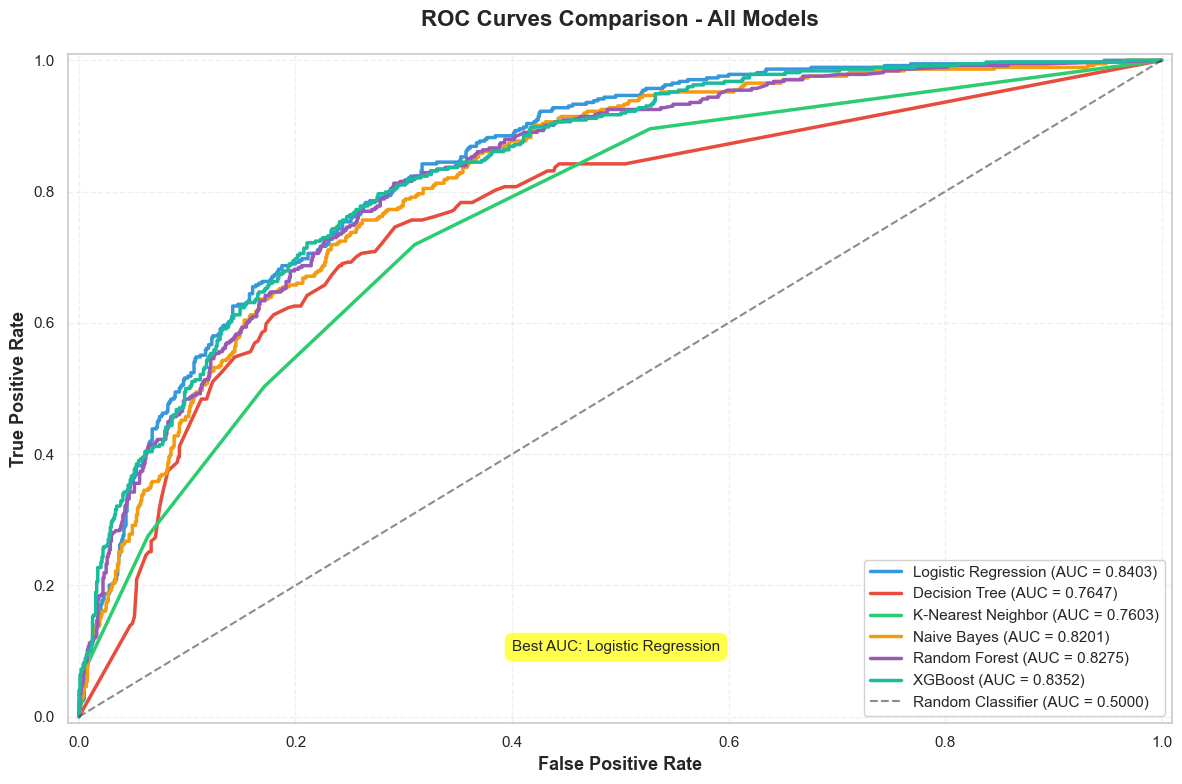


AUC Score Ranking (Best to Worst):
1. Logistic Regression       - AUC: 0.8403
2. XGBoost                   - AUC: 0.8352
3. Random Forest             - AUC: 0.8275
4. Naive Bayes               - AUC: 0.8201
5. Decision Tree             - AUC: 0.7647
6. K-Nearest Neighbor        - AUC: 0.7603


In [38]:
# Compare all models' ROC curves in one plot
plt.figure(figsize=(12, 8))

# Plot ROC curves for all models
models_roc = [
    (fpr_lr, tpr_lr, auc_lr, 'Logistic Regression', '#3498db'),
    (fpr_dt, tpr_dt, auc_dt, 'Decision Tree', '#e74c3c'),
    (fpr_knn, tpr_knn, auc_knn, 'K-Nearest Neighbor', '#2ecc71'),
    (fpr_nb, tpr_nb, auc_nb, 'Naive Bayes', '#f39c12'),
    (fpr_rf, tpr_rf, auc_rf, 'Random Forest', '#9b59b6'),
    (fpr_xgb, tpr_xgb, auc_xgb, 'XGBoost', '#1abc9c')
]

for fpr, tpr, auc_score, model_name, color in models_roc:
    plt.plot(fpr, tpr, linewidth=2.5, label=f'{model_name} (AUC = {auc_score:.4f})', color=color)

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier (AUC = 0.5000)', alpha=0.5)

# Customize plot
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curves Comparison - All Models', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='lower right', fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# Add annotation for best model
best_auc_model = max(models_roc, key=lambda x: x[2])
plt.annotate(f'Best AUC: {best_auc_model[3]}', 
             xy=(0.4, 0.1), fontsize=11, 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Print AUC ranking
print("\nAUC Score Ranking (Best to Worst):")
auc_ranking = sorted([(name, auc) for _, _, auc, name, _ in models_roc], key=lambda x: x[1], reverse=True)
for rank, (model, auc) in enumerate(auc_ranking, 1):
    print(f"{rank}. {model:25} - AUC: {auc:.4f}")

### Performance Metrics Radar Chart

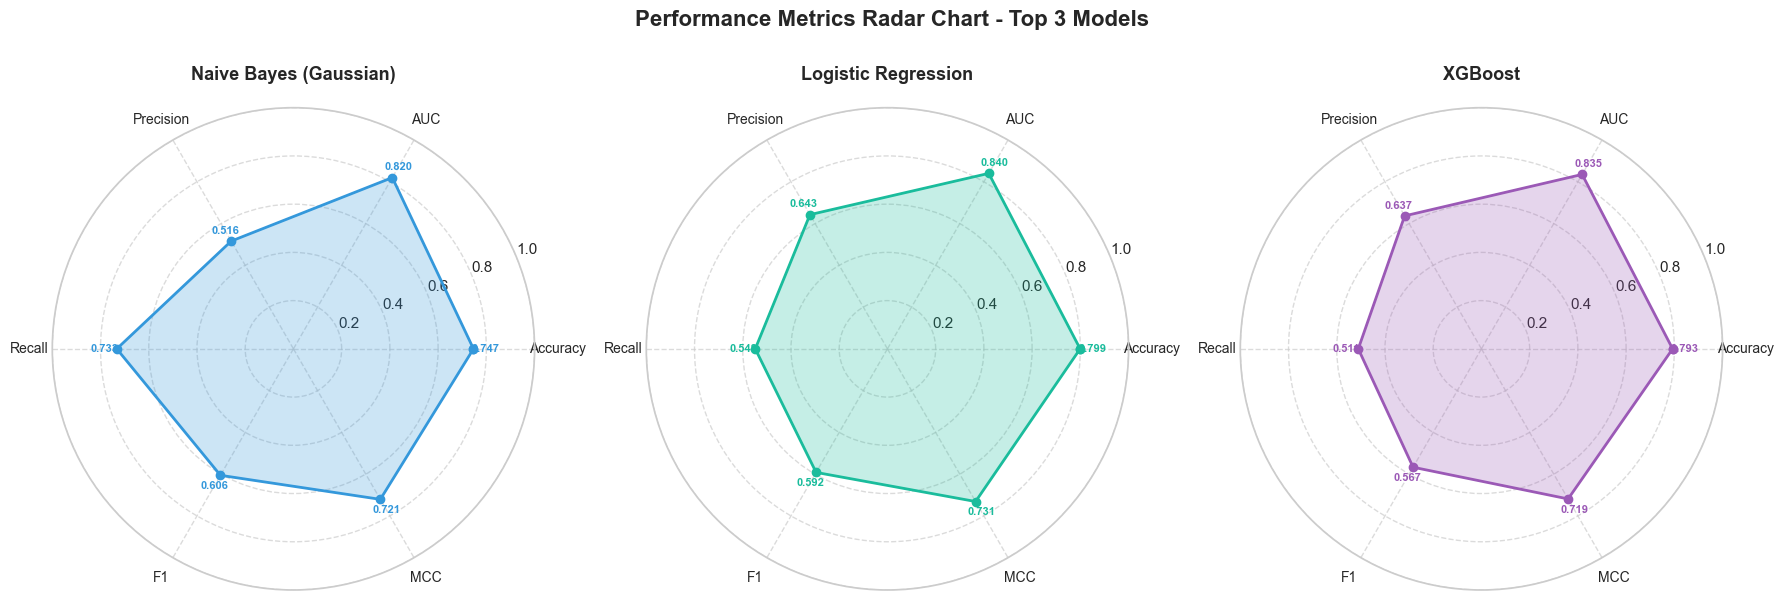

Top 3 Models by F1 Score:
                 Model  Accuracy    AUC  Precision  Recall     F1    MCC
Naive Bayes (Gaussian)    0.7466 0.8201     0.5160  0.7326 0.6055 0.4413
   Logistic Regression    0.7991 0.8403     0.6426  0.5481 0.5916 0.4621
               XGBoost    0.7928 0.8352     0.6367  0.5107 0.5668 0.4373


In [39]:
# Create radar chart for top 3 models
import numpy as np
from math import pi

# Select top 3 models by F1 score
top_3_models = results_df.nlargest(3, 'F1')

# Prepare data
categories = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))
fig.suptitle('Performance Metrics Radar Chart - Top 3 Models', fontsize=16, fontweight='bold', y=1.02)

colors = ['#3498db', '#1abc9c', '#9b59b6']

for idx, (_, model_row) in enumerate(top_3_models.iterrows()):
    # Get values for each metric
    values = [model_row['Accuracy'], model_row['AUC'], model_row['Precision'], 
              model_row['Recall'], model_row['F1'], model_row['MCC']]
    
    # Normalize MCC to 0-1 range (from -1 to 1)
    values[-1] = (values[-1] + 1) / 2
    
    # Number of variables
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]  # Complete the circle
    angles += angles[:1]
    
    # Plot
    ax = axes[idx]
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[idx], label=model_row['Model'])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.set_ylim(0, 1)
    ax.set_title(model_row['Model'], size=13, fontweight='bold', pad=20)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add value labels
    for angle, value, category in zip(angles[:-1], values[:-1], categories):
        ax.text(angle, value + 0.05, f'{value:.3f}', ha='center', va='center', 
                fontsize=8, fontweight='bold', color=colors[idx])

plt.tight_layout()
plt.show()

print("="*80)
print("Top 3 Models by F1 Score:")
print("="*80)
print(top_3_models[['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']].to_string(index=False))

In [40]:
%%html
<style>
    .top3-table {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        border-collapse: collapse;
        width: 100%;
        max-width: 900px;
        margin: 20px auto;
        box-shadow: 0 4px 8px rgba(0,0,0,0.15);
        border-radius: 8px;
        overflow: hidden;
    }
    .top3-table thead {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
    }
    .top3-table th {
        padding: 15px;
        text-align: center;
        font-weight: 600;
        font-size: 13px;
        text-transform: uppercase;
        letter-spacing: 0.5px;
    }
    .top3-table td {
        padding: 12px 15px;
        border-bottom: 1px solid #e0e0e0;
        font-size: 13px;
        text-align: center;
    }
    .top3-table tbody tr:hover {
        background-color: #f5f7fa;
        transform: scale(1.01);
        transition: all 0.2s ease;
    }
    .top3-table tbody tr:nth-child(1) {
        background-color: #fff9e6;
        font-weight: 600;
    }
    .top3-table tbody tr:nth-child(2) {
        background-color: #f0f8ff;
    }
    .top3-table tbody tr:nth-child(3) {
        background-color: #f5f0ff;
    }
    .model-name {
        font-weight: 600;
        color: #2c3e50;
        text-align: left;
    }
    .metric-value {
        font-family: 'Courier New', monospace;
        font-weight: 500;
    }
    .top3-header {
        text-align: center;
        font-size: 20px;
        font-weight: bold;
        color: #2c3e50;
        margin: 30px 0 15px 0;
        padding: 10px;
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        border-radius: 8px;
        max-width: 900px;
        margin-left: auto;
        margin-right: auto;
    }
    .rank-badge {
        display: inline-block;
        padding: 4px 10px;
        border-radius: 12px;
        font-size: 11px;
        font-weight: bold;
        color: white;
    }
    .rank-1 { background: linear-gradient(135deg, #f39c12 0%, #e67e22 100%); }
    .rank-2 { background: linear-gradient(135deg, #95a5a6 0%, #7f8c8d 100%); }
    .rank-3 { background: linear-gradient(135deg, #cd7f32 0%, #b87333 100%); }
</style>

<div class="top3-header">🏆 Top 3 Models by F1 Score 🏆</div>

<table class="top3-table">
    <thead>
        <tr>
            <th>Rank</th>
            <th>Model</th>
            <th>Accuracy</th>
            <th>AUC</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1 Score</th>
            <th>MCC</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><span class="rank-badge rank-1">🥇 1st</span></td>
            <td class="model-name">Naive Bayes (Gaussian)</td>
            <td class="metric-value">0.7466</td>
            <td class="metric-value">0.8201</td>
            <td class="metric-value">0.5160</td>
            <td class="metric-value">0.7326</td>
            <td class="metric-value">0.6055</td>
            <td class="metric-value">0.4413</td>
        </tr>
        <tr>
            <td><span class="rank-badge rank-2">🥈 2nd</span></td>
            <td class="model-name">Logistic Regression</td>
            <td class="metric-value">0.7991</td>
            <td class="metric-value">0.8403</td>
            <td class="metric-value">0.6426</td>
            <td class="metric-value">0.5481</td>
            <td class="metric-value">0.5916</td>
            <td class="metric-value">0.4621</td>
        </tr>
        <tr>
            <td><span class="rank-badge rank-3">🥉 3rd</span></td>
            <td class="model-name">XGBoost</td>
            <td class="metric-value">0.7928</td>
            <td class="metric-value">0.8352</td>
            <td class="metric-value">0.6367</td>
            <td class="metric-value">0.5107</td>
            <td class="metric-value">0.5668</td>
            <td class="metric-value">0.4373</td>
        </tr>
    </tbody>
</table>

Rank,Model,Accuracy,AUC,Precision,Recall,F1 Score,MCC
🥇 1st,Naive Bayes (Gaussian),0.7466,0.8201,0.5160,0.7326,0.6055,0.4413
🥈 2nd,Logistic Regression,0.7991,0.8403,0.6426,0.5481,0.5916,0.4621
🥉 3rd,XGBoost,0.7928,0.8352,0.6367,0.5107,0.5668,0.4373
